## Build binary

In [1]:
!cmake -B build -S cpp -DCMAKE_BUILD_TYPE=Release
!make -j -C build

-- The CXX compiler identification is AppleClang 15.0.0.15000040
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /Library/Developer/CommandLineTools/usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found Boost: /opt/homebrew/lib/cmake/Boost-1.83.0/BoostConfig.cmake (found suitable version "1.83.0", minimum required is "1.7") found components: program_options timer 
-- Found PkgConfig: /opt/homebrew/bin/pkg-config (found version "0.29.2") 
-- Checking for modules 'gmp;gmpxx'
--   Found gmp, version 6.3.0
--   Found gmpxx, version 6.3.0
-- Found Eigen3 Version: 3.4.0 Path: /opt/homebrew/share/eigen3/cmake
-- Found Boost: /opt/homebrew/lib/cmake/Boost-1.83.0/BoostConfig.cmake (found suitable version "1.83.0", minimum required is "1.7")  
-- Could NOT find CLANG_FORMAT: Found unsuitable version "0.0", but required is at least "9" (found CLANG_FORMAT_EXECUTABLE-NOTFOUND)
-- The

## Run Experiments

### Synthetic data
We run the experiments on synthetic data. First, we compute approximate solutions by the RCMC method.

In [2]:
!build/bin/pop synthetic -t A

Loaded "data/synthetic.txt".
Running the RCMC method...
Running time: 0 sec
Saved results to "result/synthetic-pop-A-15.txt".


In [3]:
!build/bin/pop synthetic -t B

Loaded "data/synthetic.txt".
Running the RCMC method...
Running time: 0 sec
Saved results to "result/synthetic-pop-B-15.txt".


We next compute reference times.

In [4]:
!build/bin/epoch synthetic

Loaded "data/synthetic.txt".
#EQ = 6
#TS = 5

Computing epochs...
 0.000000s wall, 0.000000s user + 0.000000s system = 0.000000s CPU (n/a%)
Saved epochs to "result/synthetic-epoch-15.csv".


We compute the eigendecomposition of the rate constant matrix in 200 digits precision to compare the output of the RCMC method with the analytic solution.

In [6]:
!build/bin/eigen synthetic

Loaded "data/synthetic.txt".
Begin factorize_from

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************
Begin retrieve_ritzpair

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************
Begin restarting
0th iteration
Begin sort_ritzpair
Finished. 5 eigenvalues converged after 1 iterations.

Retriving the eigenvalues
Retriving the eigenvectors
Computing `ritz_vec_conv`

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************
Multiplying `V` and `ritz_vec_conv`
Converting the eigenvectors from `S` to `K`
Saving the result

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************


For plotting, we compute the analytic solution using the eigendecomposition.

In [7]:
!build/bin/ode synthetic

Loaded "data/synthetic.txt".
Loaded "result/synthetic-eig-200.txt".
Maximum error of the coefficients = 1.90496e-198
Computing 300 populations from t = 1.39082e-17 to 6.28777e+24

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************
Saved population history to "result/synthetic-ode-200.csv".


RCMC output and analytic solution can be plot as follows (Figures 2 in the paper).

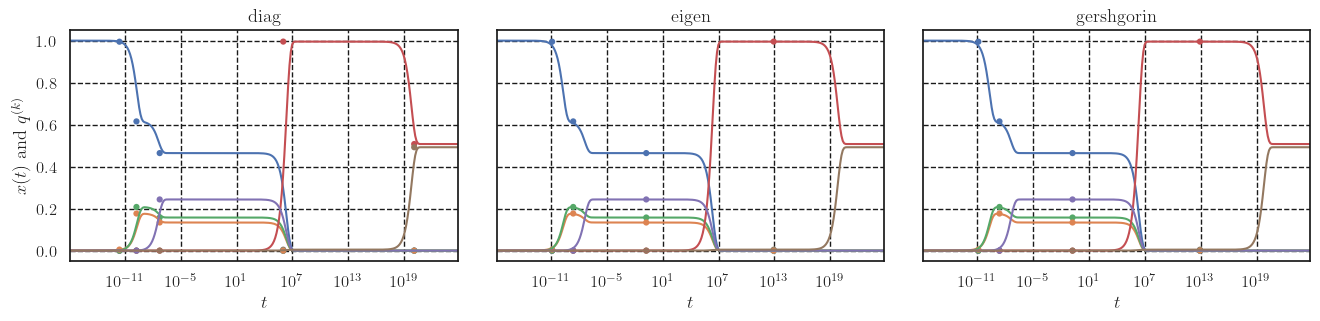

In [8]:
from python.plot import show_rcmc_ode_all_references
show_rcmc_ode_all_references('synthetic', 'A')

For error analysis, we then compute the analytic solution at reference times.

In [9]:
!build/bin/ode synthetic --epoch

Loaded "data/synthetic.txt".
Loaded "result/synthetic-eig-200.txt".
Maximum error of the coefficients = 1.90496e-198
Computing 15 populations loaded from "result/synthetic-epoch-15.csv"

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************
Saved population history to "result/synthetic-ode-epoch-200-15.csv".


The $\pi$-norm errors can be plot as follows (Figure 1 in the paper).

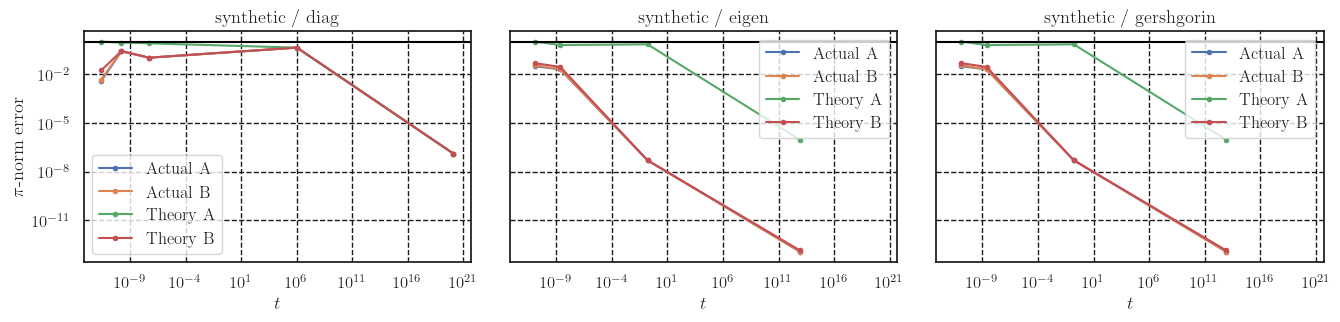

In [10]:
from python.plot import show_pi_error_all_references
show_pi_error_all_references('synthetic')

Semi-log plots of the $\pi$-, $L_{\infty}$-norm errors, and the outputs can be made as follows (Figure 3 in the paper).

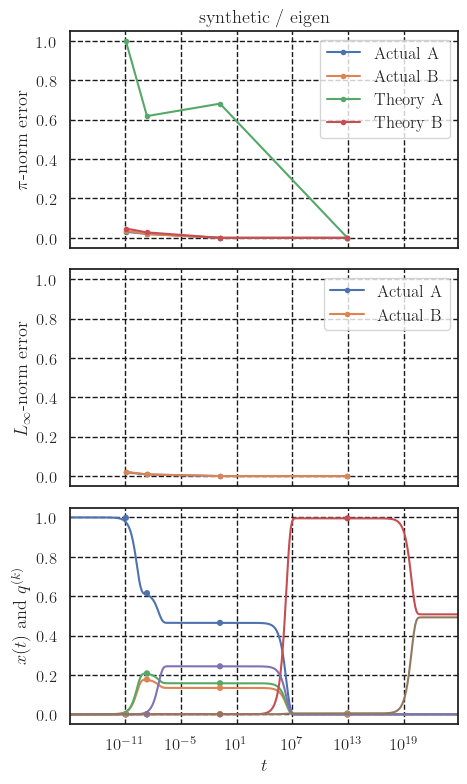

In [11]:
from python.plot import stack_semilog_plots
stack_semilog_plots('synthetic', 'eigen')

### Real data
The experiments on real data can be conducted in the same way as we did for synthetic data.

In [ ]:
# Warning: this cell takes a long time to run

!build/bin/pop DFG -t A
!build/bin/pop DFG -t B
!build/bin/epoch DFG
!build/bin/eigen DFG
!build/bin/ode DFG
!build/bin/ode DFG --epoch

from python.plot import show_pi_error_all_references
show_pi_error_all_references('DFG')

In [ ]:
# Warning: this cell takes a long time to run

!build/bin/pop WL -t A
!build/bin/pop WL -t B
!build/bin/epoch WL
!build/bin/eigen WL
!build/bin/ode WL
!build/bin/ode WL --epoch

from python.plot import show_pi_error_all_references
show_pi_error_all_references('WL')